In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\jagad\gamaka\ML\projects\newyork_311call\311_Service_Requests_from_2010_to_Present.csv")

C:\Users\jagad\anaconda3\envs\py38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
df.shape

(300698, 53)

In [6]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']
df['Request_Closing_Time_minutes']=df['Request_Closing_Time'].dt.seconds/60
df.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_minutes
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,55.25


#  1. Order complaint types based on the average Closing Time and location

In [7]:
# Order complaint types based on the average ‘Request_Closing_Time’, grouping complaints for their locations.

order = df[['City', 'Complaint Type', 'Request_Closing_Time_minutes']]
order.groupby(['City', 'Complaint Type'])['Request_Closing_Time_minutes'].mean().to_frame()

Request_Closing_Time_minutes
City     Complaint Type                                       
ARVERNE  Animal Abuse                               129.217544
         Blocked Driveway                           151.558095
         Derelict Vehicle                           178.093210
         Disorderly Youth                           215.475000
         Drinking                                    14.316667
...                                                        ...
Woodside Blocked Driveway                           384.372727
         Derelict Vehicle                           298.000000
         Illegal Parking                            298.752167
         Noise - Commercial                         143.650000
         Noise - Street/Sidewalk                    204.676667

[764 rows x 1 columns]

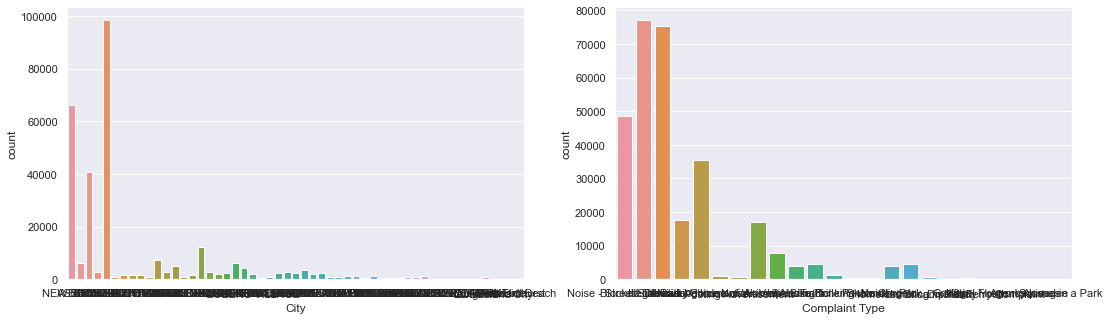

In [35]:
cat_cols = ['City', 'Complaint Type', 'Agency' , 'Request_Closing_Time_minutes']
i=0
while i < 1:
    fig = plt.figure(figsize=[18,5])
      
    plt.subplot(1,2,1)
    
    sns.countplot(x=cat_cols[i],data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()


# 2. Total complaints and complaints classification 

In [36]:
# grphical representation of complaint types 
df['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

# 3. Most common complaints

<AxesSubplot:title={'center':'Most Common Complaints'}>

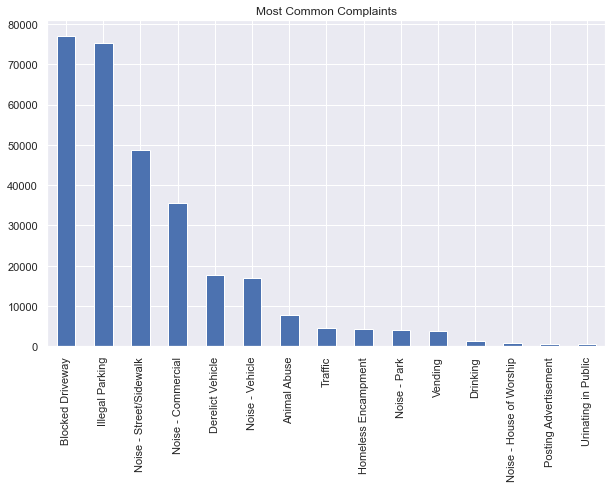

In [37]:
(df['Complaint Type'].value_counts()).head(15).plot(kind='bar',figsize=(10,6),title="Most Common Complaints")

# 4. Pie chart of complaint types

array([<AxesSubplot:ylabel='Complaint Type'>], dtype=object)

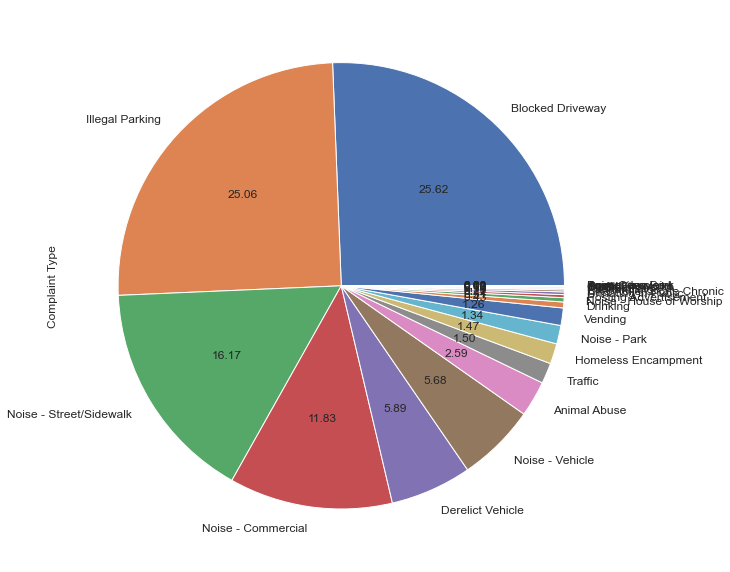

In [38]:
#df['Complaint Type'].value_counts().plot.pie(fontsize = 12, autopct = '%1.1f%%')
df['Complaint Type'].value_counts().plot.pie(subplots=True,figsize=(10,14),autopct="%.2f",fontsize=12)

# 5. Area of complaints

<AxesSubplot:title={'center':'Location type Vs Complain'}>

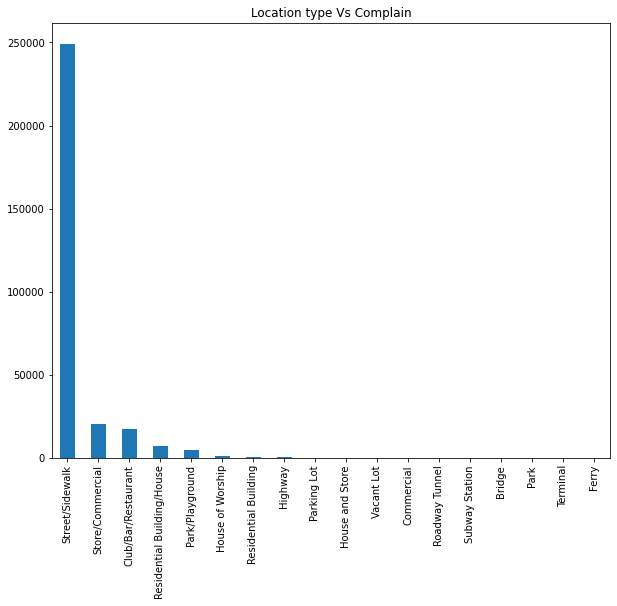

In [80]:
df['Location Type'].value_counts().plot(kind='bar',figsize=(10,8),title='Location type Vs Complain')

# 6. City of complaints

<AxesSubplot:title={'center':'Cities of Complaints'}>

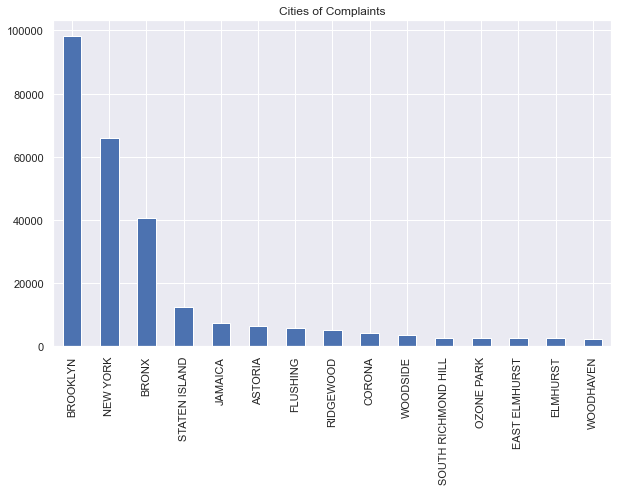

In [40]:
(df['City'].value_counts()).head(15).plot(kind='bar',figsize=(10,6),title="Cities of Complaints")